Make sure to manually install [cmip6_preprocessing](https://github.com/jbusecke/cmip6_preprocessing) by doing the following in the terminal:

```shell
git clone https://github.com/jbusecke/cmip6_preprocessing.git #You only need to do this once!!!
cd cmip6_preprocessing # These you need to do each time after restarting
python setup.py develop
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Still need to recreate dzt!!!!

In [3]:
%matplotlib inline
import xarray as xr
import intake
import util
import warnings
from cmip6_preprocessing.preprocessing import full_preprocessing, read_data, import_data

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [4]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28657 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28657 zstore(s)

	> 59 dcpp_init_year(s)

In [6]:
col.search(variable_id=['areacello'], grid_label='gr').df.drop_duplicates(subset='source_id')

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
13078,CMIP,NASA-GISS,GISS-E2-1-H,piControl,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP/NASA-GISS/GISS-E2-1-H/piContro...,NaN
13718,CMIP,NCAR,CESM2-WACCM,piControl,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP/NCAR/CESM2-WACCM/piControl/r1i...,NaN
14192,CMIP,NCAR,CESM2,historical,r10i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN
16613,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r...,NaN
16688,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP/NOAA-GFDL/GFDL-ESM4/historical...,NaN


In [10]:
with warnings.catch_warnings(): # these lines just make sure that the warnings dont clutter your notebook
    warnings.simplefilter("ignore")
    data_dict = read_data(col,
                    experiment_id=['piControl'],
                    grid_label='gn',
                    variable_id=['thetao', 'uo', 'vo'],#,
#                     member_id = 'r1i1p1f1', # so that this runs faster for testing
                    source_id = ['CESM2']
                    )

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)
--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)
--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)
CESM2
Grid Type: B detected


In [11]:
from xgcm import Grid

In [15]:
ds = data_dict['CESM2']
grid = Grid(*standardized_metrics(ds))

In [16]:
grid.average()

<xgcm.Grid>
Y Axis (periodic):
  * center   y --> left
  * left     y_left --> center
X Axis (periodic):
  * center   x --> left
  * left     x_left --> center
Z Axis (periodic):
  * center   lev
T Axis (periodic):
  * center   time

In [10]:
from cmip6_preprocessing.preprocessing import cmip6_renaming_dict
a = cmip6_renaming_dict()
a

{'BCC-CSM2-MR': {'x': ['lon'],
  'y': ['lat'],
  'lon': ['longitude'],
  'lat': ['latitude'],
  'lev': ['lev'],
  'lev_bounds': ['lev_bounds'],
  'lon_bounds': ['lon_bnds'],
  'lat_bounds': ['lat_bnds'],
  'vertex': ['vertex']},
 'BCC-ESM1': {'x': ['lon'],
  'y': ['lat'],
  'lon': ['longitude'],
  'lat': ['latitude'],
  'lev': ['lev'],
  'lev_bounds': ['lev_bounds'],
  'lon_bounds': ['lon_bnds'],
  'lat_bounds': ['lat_bnds'],
  'vertex': ['vertex']},
 'CAMS-CSM1-0': {'x': ['i'],
  'y': ['j'],
  'lon': ['longitude'],
  'lat': ['latitude'],
  'lev': ['lev'],
  'lev_bounds': ['lev_bounds'],
  'lon_bounds': None,
  'lat_bounds': None,
  'vertex': None},
 'CanESM5': {'x': ['i'],
  'y': ['j'],
  'lon': ['longitude'],
  'lat': ['latitude'],
  'lev': ['lev'],
  'lev_bounds': ['lev_bounds'],
  'lon_bounds': None,
  'lat_bounds': None,
  'vertex': None},
 'CNRM-CM6-1': {'x': ['x'],
  'y': ['y'],
  'lon': ['lon'],
  'lat': ['lat'],
  'lev': ['lev'],
  'lev_bounds': ['lev_bounds'],
  'lon_bounds':

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/utils.py", line 662, in log_errors
    yield
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/client.py", line 1284, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/utils.py", line 662, in log_errors
    yield
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/client.py", line 1013, in _reconnect
    await self._close()
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/client.py", line 1284, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures

In [ ]:
from xhistogram.xarray import histogram
import numpy as np
def omz_volume(o2, vol, o2_bins, dim=['x', 'y', 'lev']):
    nanmask = np.isnan(o2)
    # Should we also check the bin data for nans?
    
    omz_vol = histogram(
        o2.where(~nanmask),
        bins=[o2_bins],
        weights=vol.where(~nanmask),
        dim=dim,
    )
    return omz_vol

In [ ]:
o2_bins = np.arange(0,300, 20)
ds_test = data_dict['CanESM5']
omz = omz_volume(ds_test.o2*1e3, (ds_test.thkcello * ds_test.areacello), o2_bins)

In [ ]:
# ocean volume in each oxygen bin
omz.isel(time=0).plot()

In [ ]:
# lets look at the full volume at e.g. 80 mymol/kg
omz_80 = omz.cumsum('o2_bin').sel(o2_bin=80, method='nearest')
omz_80.isel(time=0).load()

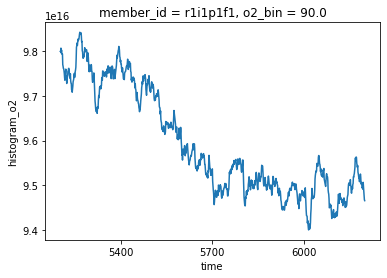

In [13]:
# the time evolution of the volume of < 80 mymols/kg waters
omz_80.plot()

In [25]:
ds_test = data_dict['CESM2']
ds_test

<xarray.Dataset>
Dimensions:     (d2: 2, lev: 60, member_id: 1, time: 14400, vertices: 4, x: 320, x_left: 320, y: 384, y_left: 384)
Coordinates:
  * y           (y) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * lev         (lev) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * x           (x) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * time        (time) object 0001-01-15 12:59:59 ... 1200-12-15 12:00:00
  * member_id   (member_id) <U8 'r1i1p1f1'
  * x_left      (x_left) float64 0.5 1.5 2.5 3.5 4.5 ... 316.5 317.5 318.5 319.5
  * y_left      (y_left) float64 0.5 1.5 2.5 3.5 4.5 ... 380.5 381.5 382.5 383.5
    dxe         (y, x_left) float64 2.35e+04 2.35e+04 ... 1.476e+04 1.479e+04
    dyn         (y_left, x) float64 1.681e+07 1.681e+07 ... 5.027e+04 5.03e+04
    dxt         (y, x) float64 2.35e+04 2.35e+04 ... 1.477e+04 1.479e+04
    dxne        (y_left, x_left) float64 1.914e+04 1.914e+04 ... 1.56e+04
    dxn         (y_left, x) float64 

In [12]:
ds_test = data_dict['MCM-UA-1-0']

In [17]:
# ok lets recreate the vertical spacing
from xgcm.autogenerate import generate_grid_ds
# Generate 'full' dataset, which includes additional coordinate `depth_left` and appropriate attributes.
ds_full = generate_grid_ds(ds_test, {'Z':'lev'}, pad=)
print(ds_full)
print(ds.depth.data)
print(ds_full.depth_left.data)

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 18, lev_left: 18, member_id: 1, time: 6000, x: 192, x_right: 192, y: 80, y_right: 80)
Coordinates:
  * lev        (lev) float64 20.0 61.71 107.8 ... 3.373e+03 3.999e+03 4.662e+03
  * x          (x) float64 -0.9375 0.9375 2.812 4.688 ... 353.4 355.3 357.2
  * y          (y) float64 -88.63 -86.13 -83.88 -81.63 ... 83.88 86.13 88.63
  * bnds       (bnds) float64 1.0 2.0
  * time       (time) object 0001-01-17 00:00:00 ... 0500-12-17 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
    lon        (x, y) float64 -0.9375 -0.9375 -0.9375 ... 357.2 357.2 357.2
    lat        (x, y) float64 -88.63 -86.13 -83.88 -81.63 ... 83.88 86.13 88.63
  * x_right    (x_right) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * y_right    (y_right) float64 -87.38 -85.0 -82.75 -80.51 ... 85.0 87.38 89.88
    lon_ne     (x_right, y_right) float64 0.0 0.0 0.0 0.0 ... 358.1 358.1 358.1
    lat_ne     (x_right, y_right) float64 -87.26 -85.0 -82.75 ... 87.26 90.

NameError: name 'ds' is not defined

In [13]:
# Here I am trying to generalize the metrics. I am doing two things:
# 1) replace the reconstructed metrics with the `real` ones if they are loaded.
# 2) parse all the metrics that are found in the dataset
def standardized_metrics(ds):
    metrics = {
        ('X', 'Y'):['area_t', 'area_ne', 'area_n', 'area_e'],
        ('X',):['dxt', 'dxne', 'dxn', 'dxe'],
        ('Y',):['dyt', 'dyne', 'dyn', 'dye'],
        ('Z',):['dzt']
    }
    # parse the `real` variables over the reconstructed...
    for new, old in zip(['areacello', 'thkcello'], ['area_t', 'dzt']):
        if new in ds.variables:
            ds.coords[old] = ds[new]
            ds = ds.drop(new)
        
    # Remove metrics that are not present in dataset
    metrics = {k:[m for m in met if m in ds.variables] for k,met in metrics.items()}
    return ds, metrics

In [9]:
from xgcm import Grid

In [10]:
grids = {k: Grid(*standardized_metrics(ds)) for k,ds in data_dict.items()}

In [ ]:
!!! z axis needs a reconstruction

In [20]:
ds_test = data_dict['MCM-UA-1-0']
ds_test, metrics = standardized_metrics(ds_test)
grid = Grid(ds_test, metrics=metrics)
grid

<xgcm.Grid>
X Axis (periodic):
  * center   x --> right
  * right    x_right --> center
T Axis (periodic):
  * center   time
Z Axis (periodic):
  * center   lev
Y Axis (periodic):
  * center   y --> right
  * right    y_right --> center

In [27]:
def hor_streamfunction(u,grid):
    u_int = grid.integrate(u, 'Z')
    print(u_int)
    

In [28]:
hor_streamfunction(ds_test.uo, grid)

KeyError: "Unable to find any combinations of metrics for array dims {'member_id', 'x_right', 'y_right', 'lev', 'time'} and axes 'Z'"

In [9]:
import gsw
def heat_capacity():
    # for now return constant value. Should be replaced with gsw routine?
    return 3850.0

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

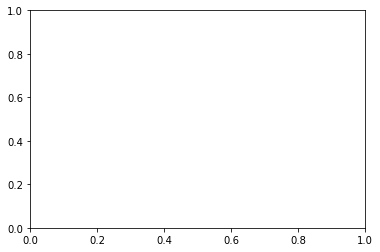

In [21]:
rho_ref = 1035
cp = heat_capacity()
grid.integrate(ds_test.thetao * cp * rho_ref, ['X', 'Y', 'Z']).squeeze().plot()

In [103]:
def moc(v, grid):
    v = v.copy()
    v_int = grid.integrate(v, 'X')
    # we need to conserve the coords!
    x_dim = grid._get_dims_from_axis(v,'X')[0]
#     temp = v[{x_dim:1}]
# #     for co in temp.coords:
# #         v_int.coords[co] = temp[co]
    print(v_int)
    moc = grid.cumsum(v_int*v_int.dyne, 'Y')
    return moc

In [104]:
streamf = moc(ds_test.vo, grid) 

<xarray.DataArray (member_id: 1, time: 6000, lev: 18, y_right: 80)>
dask.array<sum-aggregate, shape=(1, 6000, 18, 80), dtype=float64, chunksize=(1, 90, 18, 80), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 20.0 61.71 107.8 ... 3.373e+03 3.999e+03 4.662e+03
  * time       (time) int64 0 708 1416 2148 ... 4377060 4377792 4378524 4379256
  * member_id  (member_id) <U8 'r1i1p1f1'
  * y_right    (y_right) float64 -87.38 -85.0 -82.75 -80.51 ... 85.0 87.38 89.88


AttributeError: 'DataArray' object has no attribute 'dyne'

In [117]:
# TODO: 
# enable the full preprocessing on just tracer set (assume right shift?)
# use area if available, also dz
# reconstruct dz if not available
# are all the models bousinesque? (and is the ref density always 1035?) - for the heat capacity

# Issue about conserving coords (at least the metrics!)